In [3]:
import curve_trades as ct
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import widgets

In [4]:
w = widgets.Dropdown(
    options=['IG', 'EU'],
    value='IG',
    description='Index:',
    disabled=False,
)
w

In [5]:
index = w.value

<IPython.core.display.Javascript object>


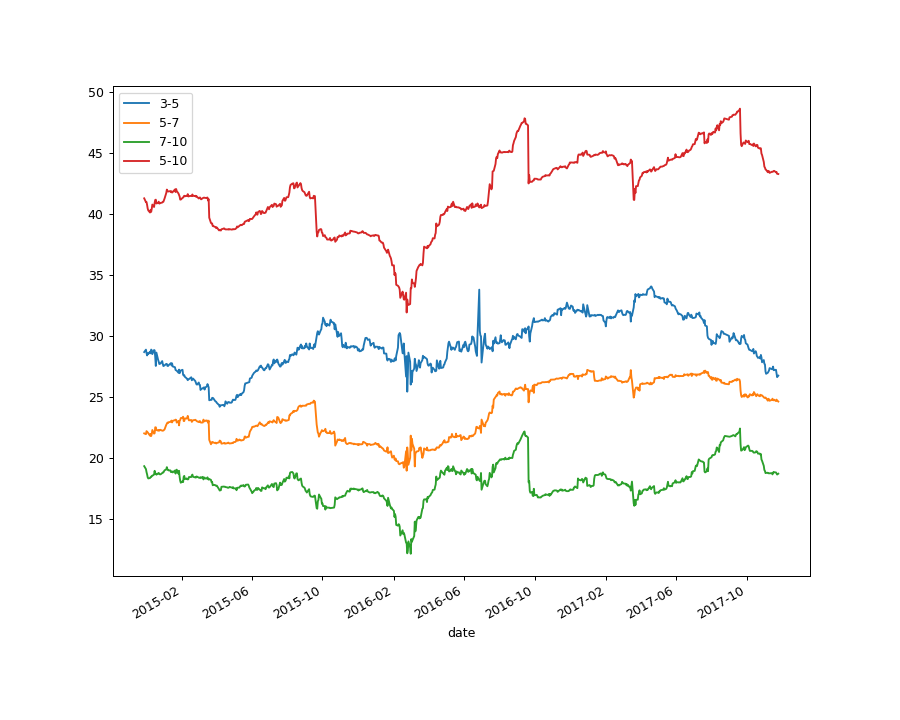

In [6]:
#On the run spread differences
spreads_diff = ct.curve_spread_diff(index, 6)
spreads_diff.plot()

<IPython.core.display.Javascript object>


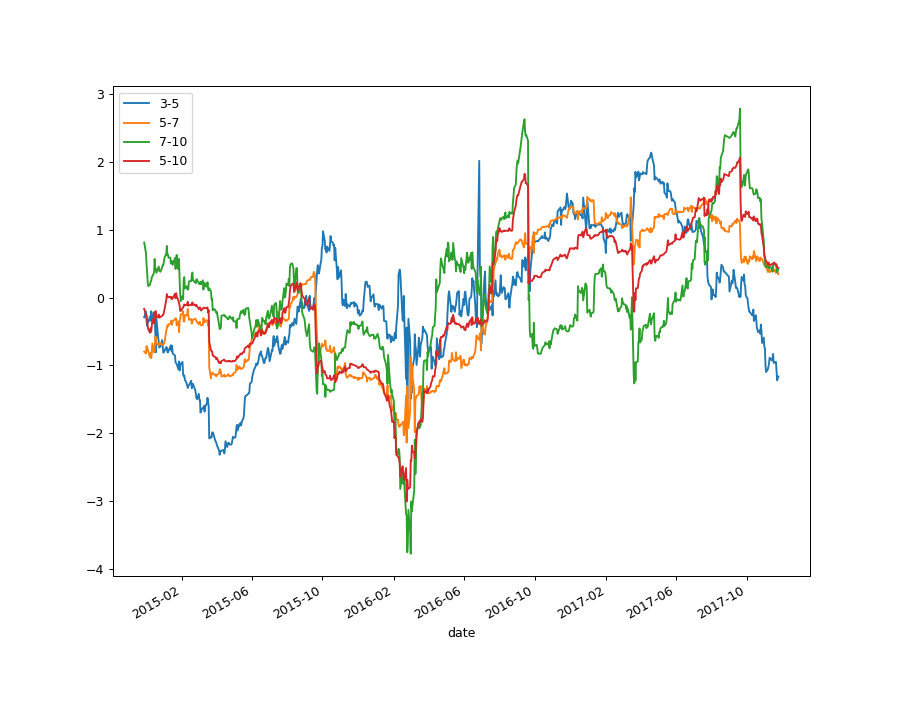

3-5        5-7       7-10       5-10
min      24.179207  18.932223  12.110608  31.924565
max      34.068608  27.213778  22.397303  48.664671
mean     29.324689  23.817895  18.031090  41.848985
current  26.739304  24.610743  18.685848  43.296591
zscore   -1.164417   0.346738   0.417601   0.438474

In [7]:
#Table of Spread Differences, and Z-score of current spread differences
ct.spreads_diff_table(spreads_diff)

In [8]:
#Theta per unit duration
ct.theta_matrix_by_series(index)

tenor        3yr       5yr       7yr      10yr
series                                        
23           NaN       NaN       NaN       NaN
24           NaN       NaN       NaN       NaN
25      0.000796  0.002174  0.002758  0.001844
26      0.001000  0.002093  0.002569  0.001756
27      0.001362  0.002289  0.002491  0.001678
28      0.001654  0.002405  0.002372  0.001617
29      0.001702  0.002350  0.002144  0.001547

<IPython.core.display.Javascript object>


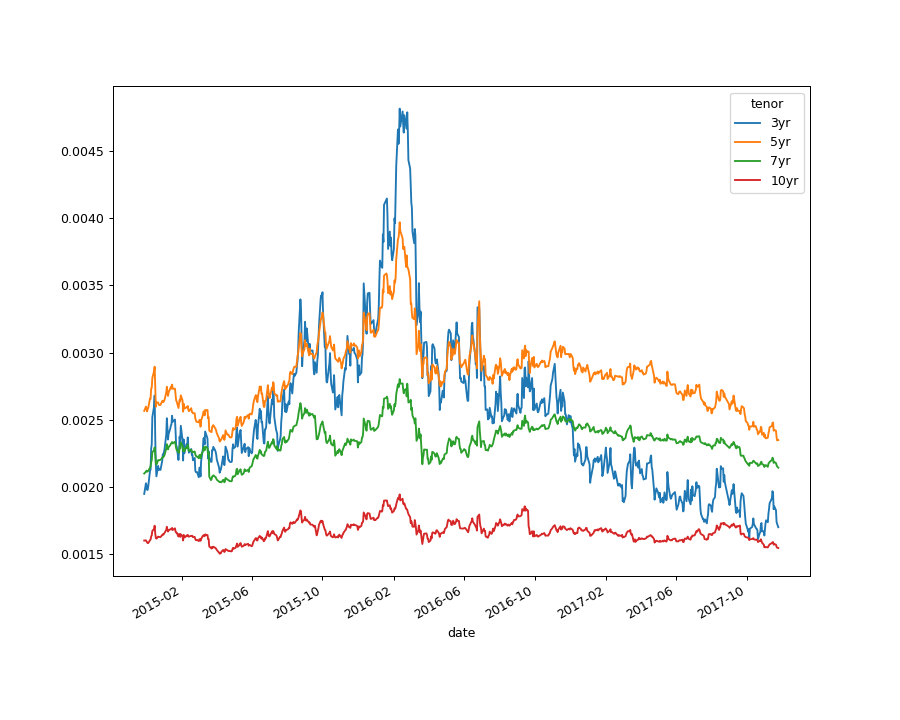

In [9]:
#on the run theta
ct.on_the_run_theta(index)

In [10]:
#Curve Trade returns
ct.curve_returns()

/home/guillaume/projects/code/python/exploration/curve_trades.py:98: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  groupby(pd.TimeGrouper(freq='M')).


3-5    3-5-10       3-7      5-10      7-10
Sharpe                       0.238939  1.461529 -0.413742  2.435553  1.265817
Mean Worst 10 Days DrawDown -0.000748 -0.001212 -0.000872 -0.000646 -0.000639
Monthly Sharpe               0.409692  1.720837 -0.445668  1.702420  1.161168

In [143]:
ct.cross_series_curve(index)

In [144]:
#Theta with 3-5-10 Strategy
df = ct.ratio_within_series(param='duration')
ct.curve_3_5_10(df)

<IPython.core.display.Javascript object>

In [145]:
#Theta with 5-10 Strategy
df = ct.ratio_within_series(param='duration')
ct.curve_5_10(df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


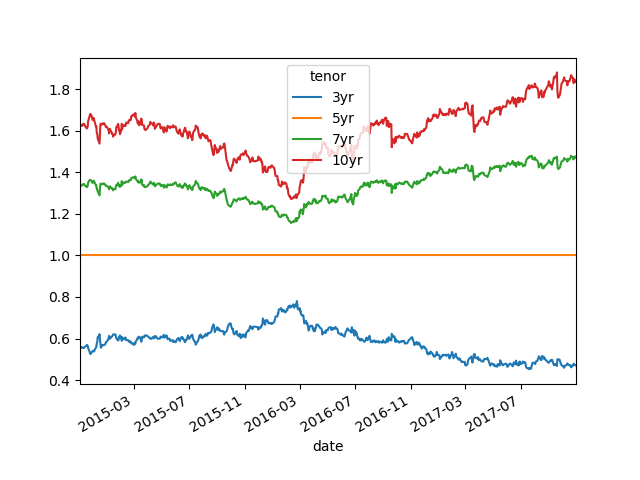

In [149]:
#Relative Spread Difference
spread_ratio = ct.ratio_within_series(param = 'closespread')
spread_ratio.groupby(level = ['date']).last()['closespread_ratio_to_5yr'].plot()

<IPython.core.display.Javascript object>


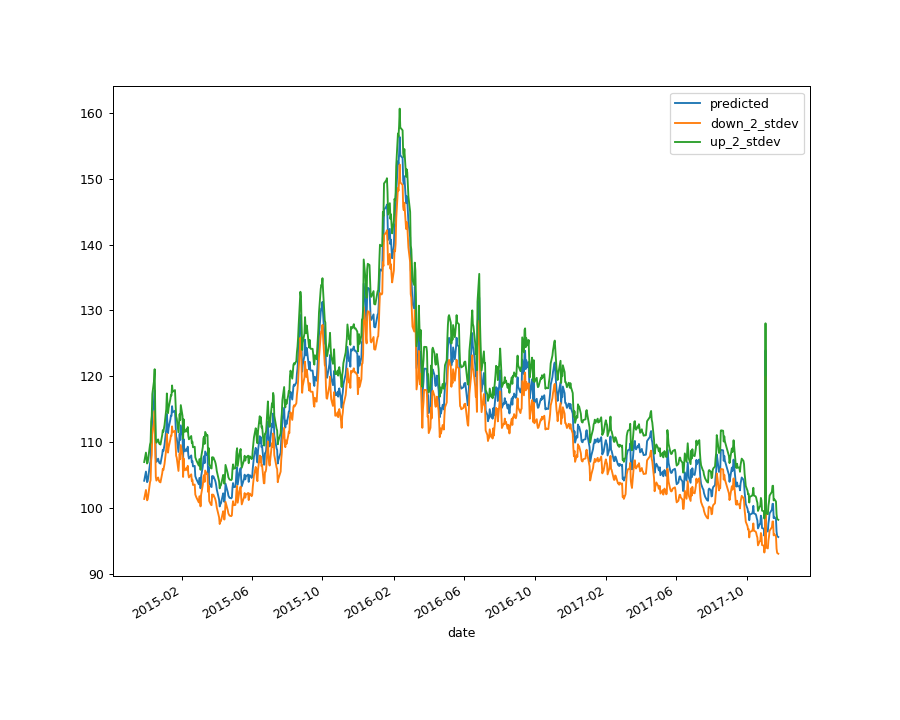

In [11]:
model = ct.curve_model()
model_results = ct.curve_model_results(model[0], model[1])

In [12]:
model[1].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ratio   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     6334.
Date:                Mon, 27 Nov 2017   Prob (F-statistic):               0.00
Time:                        14:47:03   Log-Likelihood:                 2133.4
No. Observations:                 742   AIC:                            -4257.
Df Residuals:                     737   BIC:                            -4234.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.8498      0.113     51.951      0.000       5.629       6.071
closespread    -0.6201      0.007    -83.803      0.000      -0.635      -0.606
duration1      -0.3168      0.020    -16.105      0.000      -0.355      -0.278
theta1          0.1283      0.014      9.501      0.000       0.102       0.155
theta2          0.3950      0.020     19.401      0.000       0.355       0.435
==============================================================================
Omnibus:                     1103.214   Durbin-Watson:                   0.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           640506.151
Skew:                          -8.019   Prob(JB):                         0.00
Kurtosis:                     146.038   Cond. No.                     1.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
#Var on current position
results = ct.curve_var()

AttributeError: module 'curve_trades' has no attribute 'curve_var'

In [ ]:
results
#first number: at 5% flatness
#second number: at predicted curve shape
#third number: at 5% flatness given duration and spread